<a href="https://colab.research.google.com/github/aayushbhurtel/Numerical-Methods/blob/main/BhurtelAayush_4413_Lesson8_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



Numerical Method CPSMA 441 Prof: Nicholas Jacobs

Member(s): Hoang Tan Truong, Aakriti Khadka, Aayush Bhurtel, Jordan Moreno

# Project Module 7: Ordinary Differential Equations

our orginal function was:


          f(x) = ln(x+1)


Here, using our original function, we are about to graph a solution to the differential equations initial value problem of 

$$
\frac{dy}{dx} = f(x,y) \quad\quad y(x_0)=y_0
$$

I am going to look at the equation,
$$
\frac{dy}{dx} = \sin x\left(1-y\right)\quad\quad y(0) = 2
$$
According to the assignment the solution should be,
$$
y(x) = 1+ e^{\ -xln(x+1) - ln(x+1)+x+1-C}
$$


In [2]:
import numpy as np
from scipy import integrate
import matplotlib.pyplot as plt
import pandas as pa
import math


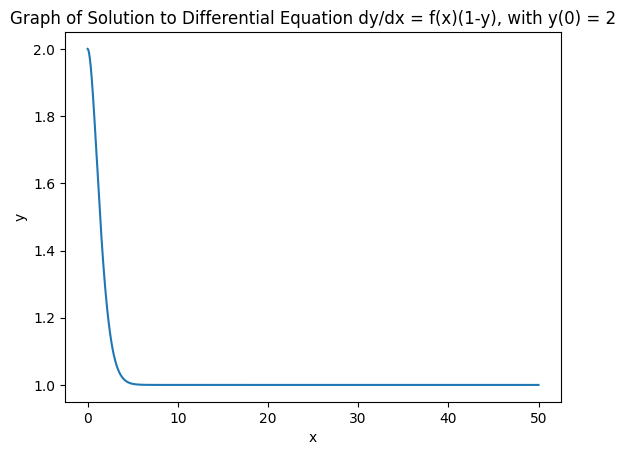

In [31]:

def f(x,y):
    return np.log(x+1)*(y-1)

def g(x):
    return 1 + math.e**(-x * np.log(x+1) + x - np.log(x + 1))
     

t = np.linspace(0, 50, 1000)
plt.plot(t,g(t))
     
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of Solution to Differential Equation dy/dx = f(x)(1-y), with y(0) = 2')
plt.show()

# Euler

For our first method, we will approximate the solution by computing the next value in approximation.

In [28]:
def euler(y0, f, n):
    h=n[1]-n[0]
    y = []
    for i in n:
        y.append(y0)
        y0 = f(i,y0)*h + y0
    return np.array(y)

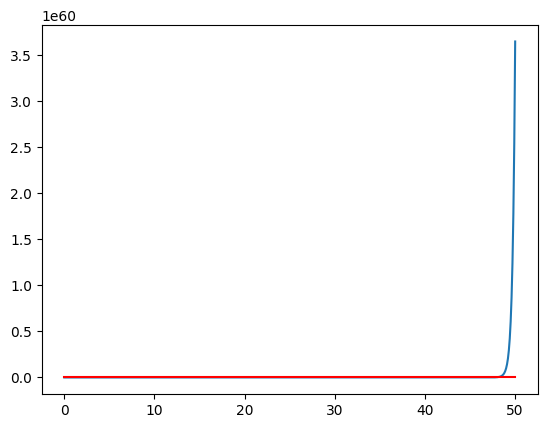

In [30]:
euler1 =euler(2,f,t)
plt.plot(t,euler1)
plt.plot(t,g(t),'r')
     

# Runge-Kutta 4th order

Much like Euler's method we are interested in solving a differential equation fo the form, $\frac{dy}{dx}= f(x,y)$.  We will have an initial point and iterate to the next using
$$
y_{i+1} = y_i + \frac h6 \left( k_1+2k_2+2k_3+k_4\right)
$$
where 
$$
\begin{align}
&k_1 = f(x_i,y_i)\\
&k_2 = f\left(x_i+\frac h2,y_i+\frac {k_1h}2\right)\\
&k_3 = f\left(x_i+\frac h 2,y_i +\frac{k_2 h}2\right)\\
&k_4 = f\left(x_i+h,y_i +k_3 h\right)
\end{align}
$$

In [ ]:
def runge_kutta(f, x0, y0, h, n):
    x = np.zeros(n+1)
    y = np.zeros(n+1)
    x[0] = x0
    y[0] = y0

    for i in range(n):
        k1 = h * f(x[i], y[i])
        k2 = h * f(x[i] + h/2, y[i] + k1/2)
        k3 = h * f(x[i] + h/2, y[i] + k2/2)
        k4 = h * f(x[i] + h, y[i] + k3)

        y[i+1] = y[i] + (k1 + 2*k2 + 2*k3 + k4) / 6
        x[i+1] = x[i] + h

    return x, y


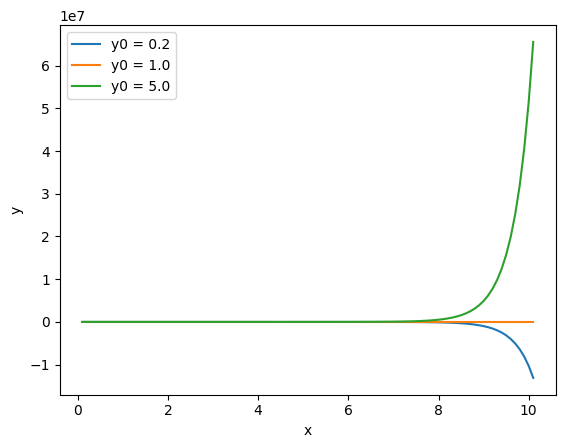

In [ ]:
# Solution 1
x0_1 = 0.1
y0_1 = 0.2
h_1 = 0.1
n_1 = 100

x1, y1 = runge_kutta(f, x0_1, y0_1, h_1, n_1)

# Solution 2
x0_2 = 0.1
y0_2 = 1.0
h_2 = 0.1
n_2 = 100

x2, y2 = runge_kutta(f, x0_2, y0_2, h_2, n_2)

# Solution 3
x0_3 = 0.1
y0_3 = 5.0
h_3 = 0.1
n_3 = 100

x3, y3 = runge_kutta(f, x0_3, y0_3, h_3, n_3)

# Plot the solutions
plt.plot(x1, y1, label='y0 = 0.2')
plt.plot(x2, y2, label='y0 = 1.0')
plt.plot(x3, y3, label='y0 = 5.0')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


Report:
First, we used our function f(x) = ln(x+1) to solve the differential equations initial value problem, which was (dy/dx) = f(x)*(1-y), y(0) = 2.
As you can see in the equations above, we found the constant and then took the derivative of y. After, we created an algorithm to perform Euler's method.
Then, using Euler's method we created a graph which shows are results. Next, we created an algorithm to perform Runge-Kutta's 4th order method.
We used the algorithm to find three different solutions on a given interval and graphed the three different solution. Lastly, we computed the errors and created a table for our results.
Our numerical methods worked, because we took inputs in for both methods and outputed solutions for both methods.

Although, we tried our best to get the result, we can see our first graph is different from Euler's. 